# __Abstract__

### This paper shows the methodological problems associated with the use of housing market data to measure the willingness to pay for clean air. With the use of a hedonic housing price model and data for the Boston metropolitan area, quantitative estimates of the willingness to pay for air quality improvements are generated. Marginal air pollution damages (as revealed in the housing market) are found to increase with the level of air pollution and with household income. The results are relatively sensitive to the specification of the hedonic housing price equation, but insensitive to the specification of the air quality demand equation

# Variables :
 ### __CRIM__ :    per capita crime rate by town
 ### __ZN__  :    proportion of residential land zoned for lots over 25,000 sq.ft.
 ### __INDUS__ :   proportion of non-retail business acres per town
 ### __CHAS__ :    Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 ### __NOX__  :    nitric oxides concentration (parts per 10 million)
 ### __RM__   :    average number of rooms per dwelling
 ### __AGE__  :    proportion of owner-occupied units built prior to 1940
 ### __DIS__  :    weighted distances to five Boston employment centres
 ### __RAD__  :    index of accessibility to radial highways
 ### __TAX__  :    full-value property-tax rate per $10,000
 ### __PTRATIO__:  pupil-teacher ratio by town
 ### __B__  :      1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 ### __LSTAT__ :   % lower status of the population
 ### __MEDV__ :    Median value of owner-occupied homes in $1000's

| Column Name      | Data type |
| ----------- | ----------- |
| CRIM     | Continuous       |
| ZN   | Continuous       |
| INDUS     | Continuous |
| CHAS      |  Category      |
| NOX   | Continuous        |
| RM      | Continuous |
| AGE      | Continuous       |
| DIS   | Continuous        |
| RAD      | Category |
| TAX      | Continuous       |
| PTRATIO   | Continuous        |
| B      | Continuous |
| LSTST      | Continuous       |
| MEDV   | Continuous        |

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import os
#show all column
pd.pandas.set_option('display.max_columns',None)

In [2]:
#import dataset and separated by spaces
house_data = pd.read_csv("C:/Users/test/Downloads/housing.csv",header=None,delimiter=r"\s+")
#or
#dataset = pd.read_csv("C:/Users/test/Downloads/housing.csv",header=None,deli_whitespace=True)

In [3]:
#check the data
house_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
#rename the column
house_data.columns = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]

In [5]:
house_data.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [6]:
#Last 20 rows
house_data.tail(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
486,5.69175,0.0,18.10,0,0.583,6.114,79.8,3.5459,24,666.0,20.2,392.68,14.98,19.1
487,4.83567,0.0,18.10,0,0.583,5.905,53.2,3.1523,24,666.0,20.2,388.22,11.45,20.6
488,0.15086,0.0,27.74,0,0.609,5.454,92.7,1.8209,4,711.0,20.1,395.09,18.06,15.2
489,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711.0,20.1,344.05,23.97,7.0
490,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711.0,20.1,318.43,29.68,8.1
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711.0,20.1,390.11,18.07,13.6
492,0.11132,0.0,27.74,0,0.609,5.983,83.5,2.1099,4,711.0,20.1,396.90,13.35,20.1
493,0.17331,0.0,9.69,0,0.585,5.707,54.0,2.3817,6,391.0,19.2,396.90,12.01,21.8
494,0.27957,0.0,9.69,0,0.585,5.926,42.6,2.3817,6,391.0,19.2,396.90,13.59,24.5
495,0.17899,0.0,9.69,0,0.585,5.670,28.8,2.7986,6,391.0,19.2,393.29,17.60,23.1


In [7]:
#shape of data
house_data.shape

(506, 14)

In [8]:
##info of data
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [9]:
#convert CHAS to categorical
house_data["CHAS"] = house_data["CHAS"].astype("category")

In [10]:
#describe the data
house_data.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
#ZN value count
house_data["ZN"].value_counts()

0.0      372
20.0      21
80.0      15
22.0      10
12.5      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
95.0       4
60.0       4
21.0       4
33.0       4
55.0       3
70.0       3
34.0       3
52.5       3
35.0       3
28.0       3
75.0       3
82.5       2
85.0       2
17.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64

In [12]:
#Null values 
house_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [13]:
#Duplicate values
house_data.duplicated().sum()

0

In [14]:
#RAD Value count
house_data["RAD"].value_counts()

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64

In [15]:
#Rows where house_data["RAD"] == 2
df1 = house_data[house_data["RAD"] == 2]
df2 = house_data[house_data["RAD"] == 4]
df3 = house_data[house_data["RAD"] == 24]

In [16]:
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
56,0.02055,85.0,0.74,0,0.410,6.383,35.7,9.1876,2,313.0,17.3,396.90,5.77,24.7
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270.0,17.8,396.90,5.50,23.6
89,0.05302,0.0,3.41,0,0.489,7.079,63.1,3.4145,2,270.0,17.8,396.06,5.70,28.7


In [17]:
#vaue count of RAD 
df1["TAX"].value_counts()

188.0    7
276.0    5
270.0    4
329.0    3
242.0    2
348.0    2
313.0    1
Name: TAX, dtype: int64

In [18]:
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
13,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307.0,21.0,396.90,8.26,20.4
14,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307.0,21.0,380.02,10.26,18.2
15,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,4,307.0,21.0,395.62,8.47,19.9
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307.0,21.0,386.85,6.58,23.1
17,0.78420,0.0,8.14,0,0.538,5.990,81.7,4.2579,4,307.0,21.0,386.75,14.67,17.5


In [19]:
df2['TAX'].value_counts()

307.0    22
437.0    15
304.0    12
277.0    11
711.0     5
289.0     5
254.0     5
243.0     4
281.0     4
305.0     4
345.0     3
270.0     3
430.0     3
245.0     3
224.0     2
337.0     2
411.0     2
334.0     2
255.0     1
351.0     1
280.0     1
Name: TAX, dtype: int64

In [20]:
df3.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
356,8.98296,0.0,18.1,1,0.77,6.212,97.4,2.1222,24,666.0,20.2,377.73,17.60,17.8
357,3.84970,0.0,18.1,1,0.77,6.395,91.0,2.5052,24,666.0,20.2,391.34,13.27,21.7
358,5.20177,0.0,18.1,1,0.77,6.127,83.4,2.7227,24,666.0,20.2,395.43,11.48,22.7
359,4.26131,0.0,18.1,0,0.77,6.112,81.3,2.5091,24,666.0,20.2,390.74,12.67,22.6
360,4.54192,0.0,18.1,0,0.77,6.398,88.0,2.5182,24,666.0,20.2,374.56,7.79,25.0


In [21]:
df3['TAX'].value_counts()

666.0    132
Name: TAX, dtype: int64

In [22]:
#convert RAD to categorical
house_data["RAD"] = house_data["RAD"].astype("category")

In [23]:
#Conert RAD values as 1-5 as Low, 6-10 as Medium, 11-15 as High and more than 15 as Very High
house_data['RAD'] = house_data['RAD'].apply(lambda x: 'Low' if x >= 1 and x <= 5 else 'Medium' if x >= 6 and x <= 10 else 'High' if x >= 11 and x <= 15  else 'Very High')

In [24]:
house_data['RAD'].value_counts()

Low          307
Very High    132
Medium        67
Name: RAD, dtype: int64

In [25]:
#skewness
house_data.skew()

C:\Users\test\AppData\Local\Temp/ipykernel_21508/59318795.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  house_data.skew()


CRIM       5.223149
ZN         2.225666
INDUS      0.295022
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
MEDV       1.108098
dtype: float64

In [26]:
numericals = house_data.select_dtypes(include=['int64','float64']).columns

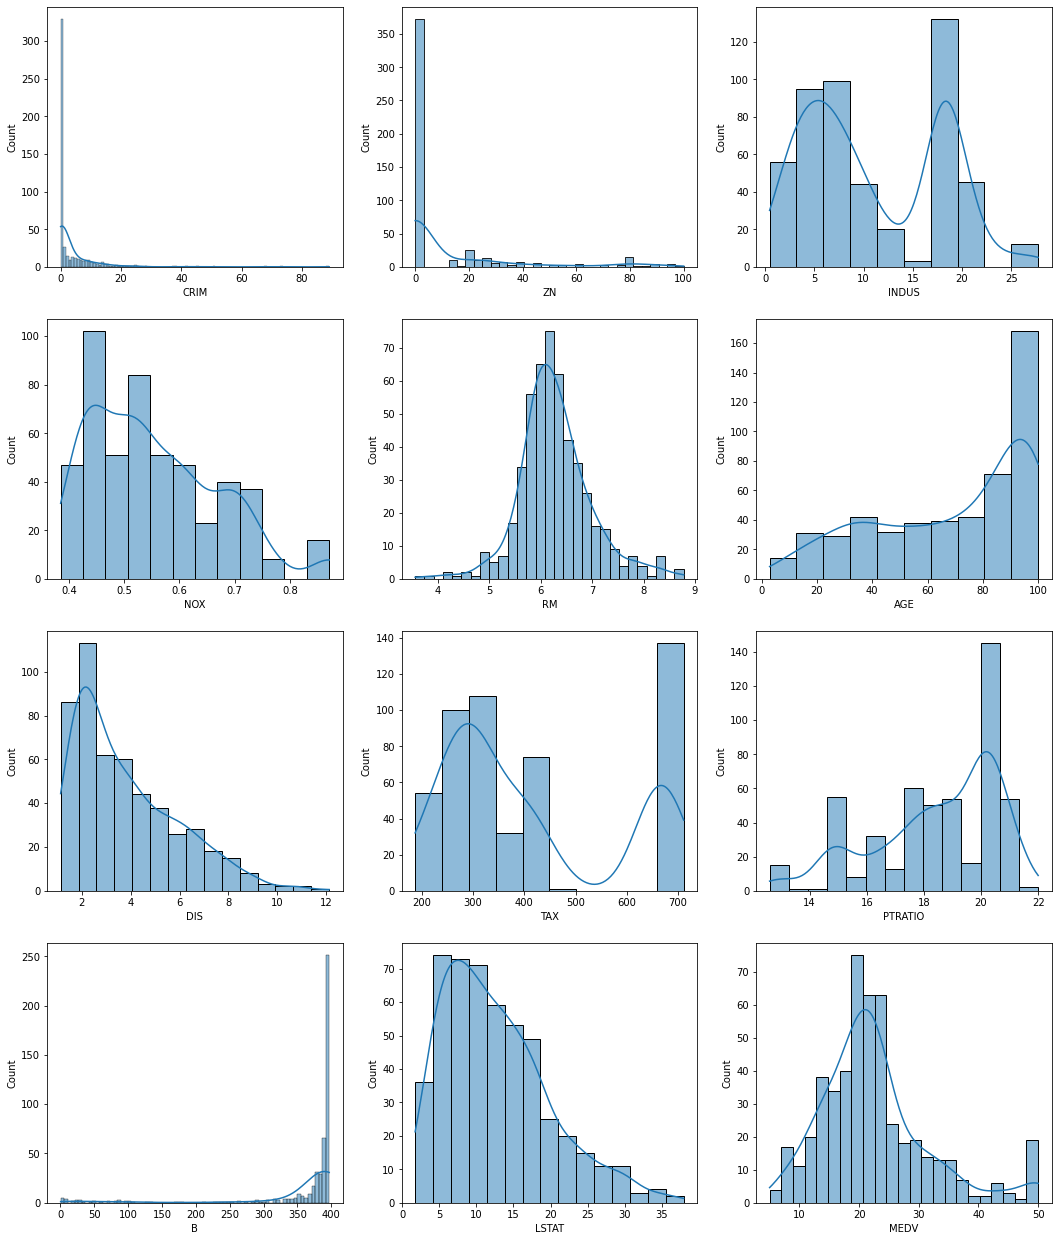

In [27]:
#all distribution plots in a single plot
_,ax = plt.subplots(4,3,figsize=(18,22))
for i in range(len(numericals)):
    sns.histplot(data=house_data[numericals[i]],ax=ax[i//3][i%3],kde=True)

In [28]:
#box cox transformation of CRIM
from scipy.stats import boxcox
y,lam = boxcox(house_data["CRIM"])
house_data["CRIM"] = y

In [29]:
#IQR of ZN
Q1 = house_data["ZN"].quantile(0.25)
Q3 = house_data["ZN"].quantile(0.75)
IQR = Q3 - Q1
Lower_bound = Q1 - 1.5*IQR
Upper_bound = Q3 + 1.5*IQR
#outliers
house_data[house_data["ZN"] < Lower_bound]
house_data[house_data["ZN"] > Upper_bound]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
39,-4.430313,75.0,2.95,0,0.428,6.595,21.8,5.4011,Low,252.0,18.3,395.63,4.32,30.8
40,-4.139970,75.0,2.95,0,0.428,7.024,15.8,5.4011,Low,252.0,18.3,395.62,1.98,34.9
54,-5.539726,75.0,4.00,0,0.410,5.888,47.6,7.3197,Low,469.0,21.1,396.90,14.80,18.9
55,-5.599625,90.0,1.22,0,0.403,7.249,21.9,8.6966,Low,226.0,17.9,395.93,4.81,35.4
56,-4.882823,85.0,0.74,0,0.410,6.383,35.7,9.1876,Low,313.0,17.3,396.90,5.77,24.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,-2.933465,60.0,1.69,0,0.411,6.579,35.9,10.7103,Low,411.0,18.3,370.78,5.49,24.1
352,-3.058094,60.0,1.69,0,0.411,5.884,18.5,10.7103,Low,411.0,18.3,392.33,7.79,18.6
353,-5.172419,90.0,2.02,0,0.410,6.728,36.1,12.1265,Low,187.0,17.0,384.46,4.50,30.1
354,-3.781625,80.0,1.91,0,0.413,5.663,21.9,10.5857,Low,334.0,22.0,382.80,8.05,18.2


In [30]:
#replace outliers with Flooring and Capping
house_data['ZN']=np.where(house_data['ZN']>Upper_bound,Upper_bound,np.where(house_data['ZN']<Lower_bound,Lower_bound,house_data['ZN']))

In [31]:
#square rot transformation of ZN
house_data["ZN"] = np.sqrt(house_data["ZN"])

In [32]:
#IQR for NOX
Q1 = np.percentile(house_data["NOX"],25)
Q3 = np.percentile(house_data["NOX"],75)
IQR = Q3-Q1
Lower_bound = Q1-1.5*IQR
Upper_bound = Q3+1.5*IQR

In [33]:
#OUTLIERS
outliers = house_data[(house_data["NOX"]<Lower_bound) | (house_data["NOX"]>Upper_bound)]
outliers

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


In [34]:
##BOX COX TRANSFORMATION OF NOX
y,lam = boxcox(house_data["NOX"])
house_data["NOX"] = y

In [35]:
#IQR for AGE
Q1 = np.percentile(house_data["AGE"],25)
Q3 = np.percentile(house_data["AGE"],75)
IQR = Q3-Q1
Lower_bound = Q1-1.5*IQR
Upper_bound = Q3+1.5*IQR
#OUTLIERS
outliers1 = house_data[(house_data["AGE"]<Lower_bound) | (house_data["AGE"]>Upper_bound)]
outliers1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


In [36]:
# Box cox transformation of Age
y,lam = boxcox(house_data["AGE"])
house_data["AGE"] = y

In [37]:
#Box cox transformation of DIS
y,lam = boxcox(house_data["DIS"])
house_data["DIS"] = y

In [38]:
#Box cox transformation of TAX
y,lam = boxcox(house_data["TAX"])
house_data["TAX"] = y

In [39]:
#Box cox transformation of PTRATIO
y,lam = boxcox(house_data["PTRATIO"])
house_data["PTRATIO"] = y

In [40]:
#B value count
house_data["B"].value_counts().sort_values(ascending=False)

396.90    121
395.24      3
393.74      3
395.69      2
394.12      2
         ... 
392.92      1
374.68      1
370.73      1
392.68      1
391.99      1
Name: B, Length: 357, dtype: int64

In [41]:
#rows where house_data["B"] == 396.90
df5 = house_data[house_data["B"] == 396.90]
df5

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-6.843991,4.242641,2.31,0,-0.834416,6.575,201.623543,1.264870,Low,1.807258,32745.311816,396.9,4.98,24.0
1,-4.447833,0.000000,7.07,0,-1.092408,6.421,260.624267,1.418585,Low,1.796577,63253.425063,396.9,9.14,21.6
4,-3.122838,0.000000,2.18,0,-1.140400,7.147,157.195622,1.571460,Low,1.791645,78392.216639,396.9,5.33,36.2
7,-2.162924,3.535534,7.87,0,-0.881494,6.172,339.776717,1.557390,Low,1.809711,31824.406423,396.9,19.15,27.1
11,-2.424375,3.535534,7.87,0,-0.881494,6.009,278.551531,1.591645,Low,1.809711,31824.406423,396.9,13.27,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,-1.553558,0.000000,9.69,0,-0.692198,6.019,202.040013,0.821757,Medium,1.820275,87927.537028,396.9,12.92,21.2
500,-1.628676,0.000000,9.69,0,-0.692198,6.027,264.185426,0.853341,Medium,1.820275,87927.537028,396.9,14.33,16.8
502,-3.708638,0.000000,11.93,0,-0.726384,6.120,250.894792,0.776403,Low,1.803104,129845.602554,396.9,9.08,20.6
503,-3.297348,0.000000,11.93,0,-0.726384,6.976,315.757117,0.728829,Low,1.803104,129845.602554,396.9,5.64,23.9


In [42]:
#value count of RAD
df5["RAD"].value_counts()

Low          77
Very High    29
Medium       15
Name: RAD, dtype: int64

In [43]:
#Rows where Rad is Low
df6 = house_data[house_data["RAD"] == "Low"]

In [44]:
#Mean of B in df6
df6["B"].median()

392.83

In [45]:
#replace B where B is 396.90 with 392.83
house_data["B"].replace(396.90,392.83,inplace=True)

In [46]:
#df7 is where B is less than 300
df7 = house_data[house_data["B"] < 300]

In [47]:
#median of B in df7
df7["B"].mean()

115.46592592592593

In [48]:
#IQR of B
Q1 = np.percentile(house_data["B"],25)
Q3 = np.percentile(house_data["B"],75)
IQR = Q3-Q1
Lower_bound = Q1-1.5*IQR
Upper_bound = Q3+1.5*IQR
#OUTLIERS
outliers3 = house_data[(house_data["B"]<Lower_bound) | (house_data["B"]>Upper_bound)]
outliers3

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
18,-0.222526,0.0,8.14,0,-0.834416,5.456,92.527104,1.204713,Low,1.809074,129845.602554,288.99,11.69,20.2
25,-0.175435,0.0,8.14,0,-0.834416,5.599,291.278420,1.333001,Low,1.809074,129845.602554,303.42,16.51,13.9
27,-0.045354,0.0,8.14,0,-0.834416,6.047,305.535342,1.332788,Low,1.809074,129845.602554,306.38,17.28,14.8
32,0.321830,0.0,8.14,0,-0.834416,5.950,274.491585,1.244950,Low,1.809074,129845.602554,232.60,27.71,13.2
34,0.465246,0.0,8.14,0,-0.834416,6.096,343.584755,1.196814,Low,1.809074,129845.602554,248.31,20.34,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,1.233073,0.0,18.10,0,-0.516776,5.952,286.716550,0.972813,Very High,1.840450,109659.937917,22.01,17.15,19.0
467,1.367962,0.0,18.10,0,-0.694996,6.003,332.193127,0.867815,Very High,1.840450,109659.937917,331.29,21.32,19.1
475,1.672863,0.0,18.10,0,-0.694996,6.162,345.970242,0.744417,Very High,1.840450,109659.937917,302.76,24.10,13.3
489,-1.870594,0.0,27.74,0,-0.627704,5.414,350.274654,0.538766,Low,1.842560,107317.835350,344.05,23.97,7.0


In [49]:
#replace outliers with Flooring and Capping
house_data['B']=np.where(house_data['B']>Upper_bound,Upper_bound,np.where(house_data['B']<Lower_bound,Lower_bound,house_data['B']))

In [50]:
#Box cox transformation of B
y,lam = boxcox(house_data["B"])
house_data["B"] = y

In [51]:
#Box cox transformation of LSTAT
y,lam = boxcox(house_data["LSTAT"])
house_data["LSTAT"] = y

In [52]:
#Box cox transformation of MEDV
y,lam = boxcox(house_data["MEDV"]) 
house_data["MEDV"] = y

In [53]:
house_data.skew()

C:\Users\test\AppData\Local\Temp/ipykernel_21508/1705195895.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  house_data.skew()


CRIM       0.093649
ZN         1.133442
INDUS      0.295022
NOX        0.060947
RM         0.403612
AGE       -0.425141
DIS        0.028653
TAX        0.079204
PTRATIO   -0.222924
B         -0.623286
LSTAT     -0.027886
MEDV       0.015882
dtype: float64

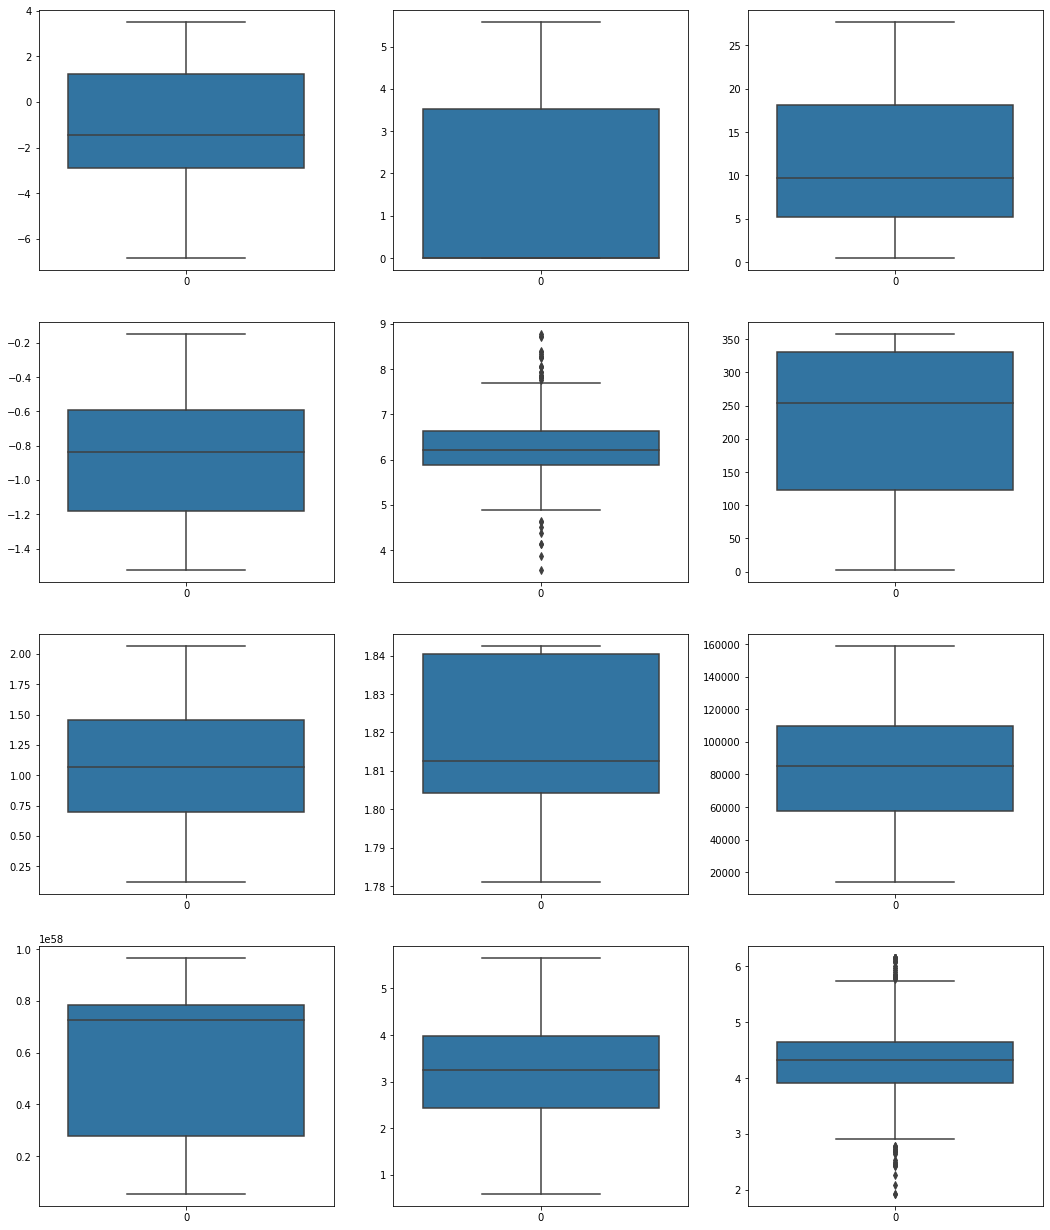

In [54]:
#BOX PLOT
_,ax = plt.subplots(4,3,figsize=(18,22))
for i in range(len(numericals)):
    sns.boxplot(data=house_data[numericals[i]],ax=ax[i//3][i%3])

In [56]:
#correlation matrix
corr = house_data.corr()
corr

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.560252,0.734370,0.820042,-0.307745,0.686306,-0.749539,0.768247,0.439323,-0.460243,0.607367,-0.528400
ZN,-0.560252,1.000000,-0.589398,-0.624367,0.332358,-0.568556,0.611304,-0.377358,-0.446768,0.216940,-0.474443,0.397273
INDUS,0.734370,-0.589398,1.000000,0.784506,-0.391676,0.662029,-0.764239,0.686218,0.424209,-0.385255,0.608841,-0.535359
NOX,0.820042,-0.624367,0.784506,1.000000,-0.304199,0.796153,-0.875035,0.646637,0.334856,-0.370241,0.608937,-0.499729
RM,-0.307745,0.332358,-0.391676,-0.304199,1.000000,-0.246546,0.264220,-0.299432,-0.348242,0.155615,-0.657241,0.652548
AGE,0.686306,-0.568556,0.662029,0.796153,-0.246546,1.000000,-0.788419,0.497541,0.331038,-0.282279,0.622247,-0.452420
DIS,-0.749539,0.611304,-0.764239,-0.875035,0.264220,-0.788419,1.000000,-0.587309,-0.296226,0.318108,-0.545923,0.391508
TAX,0.768247,-0.377358,0.686218,0.646637,-0.299432,0.497541,-0.587309,1.000000,0.451774,-0.386572,0.513285,-0.537580
PTRATIO,0.439323,-0.446768,0.424209,0.334856,-0.348242,0.331038,-0.296226,0.451774,1.000000,-0.111256,0.440735,-0.521956
B,-0.460243,0.216940,-0.385255,-0.370241,0.155615,-0.282279,0.318108,-0.386572,-0.111256,1.000000,-0.281879,0.253862


<AxesSubplot:>

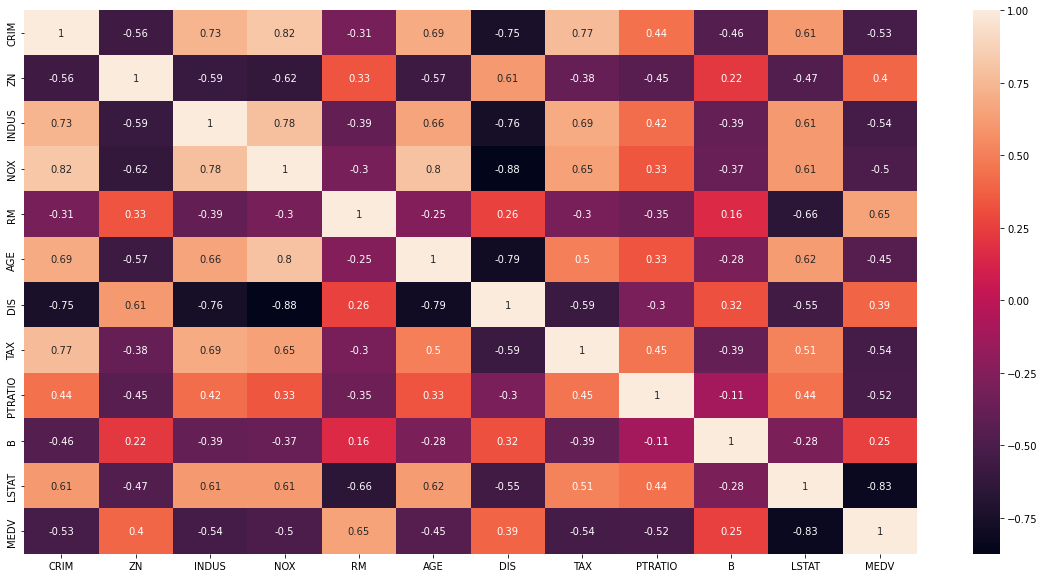

In [60]:
plt.figure(figsize=(20,10))
sns.heatmap(house_data.corr(),annot=True)

<AxesSubplot:xlabel='RAD', ylabel='count'>

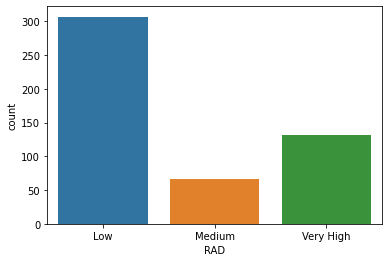

In [61]:
#Count plot of Rad
sns.countplot(x="RAD",data=house_data)

### WE can say here like, in many cities the index of accessibility to radial highways is low ...

<AxesSubplot:xlabel='RAD', ylabel='CRIM'>

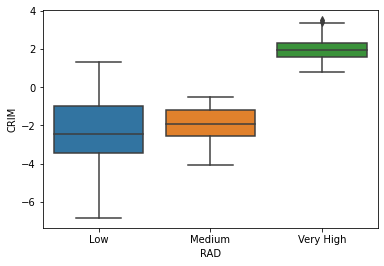

In [65]:
#box plot of RAD and CRIM
sns.boxplot(x="RAD",y="CRIM",data=house_data)

### Here we can say the crime rate is likely equal in low RAD and High RAD cities and comparatively low than Very high RAD cities..So we can say accessability to roads may increase crimes..

<AxesSubplot:xlabel='RAD', ylabel='AGE'>

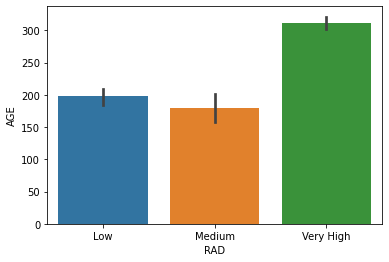

In [66]:
#Bar plot of RAD and AGE
sns.barplot(x="RAD",y="AGE",data=house_data)

### Here we can say where accessability to roads is very easy there are owners staying since 1940 and we can predit in those areas might be staying for long times..

<AxesSubplot:xlabel='CRIM', ylabel='NOX'>

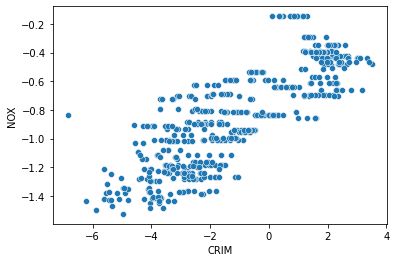

In [67]:
#plot between CRIM and NOX
sns.scatterplot(x="CRIM",y="NOX",data=house_data)

### Here we can say Crime rate is positively correlated to nitric oxcide concentration... 

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

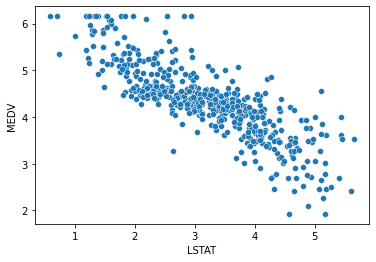

In [68]:
#plot between LSTAT and MEDV
sns.scatterplot(x="LSTAT",y="MEDV",data=house_data)

### Here we can while increase in wealth people try to get high values ...